# Polynomial Regression
*This turns out to be a special case of Multiple Linear Regression*

**Simple Linear Regression**: $y = b_0+b_1*x_1$ 
<br>
**Multiple Linear Regression**: $y = b_0+b_1*x_1+b_2*x_2+...+b_n*x_n$ 
<br>
**Polynomial Linear Regression**: $y = b_0+b_1*x_1+b_2*{x_2}^2+...+b_n*{x_n}^{n-1}$ 

Use cases of polynomial regressions include:
- modeling the spread of a disease

The diagram below shows how this data would not quite fit a linear regression model.
<br>
It is more suited to a polynomal regression model.

<img src="./images/poly_linear_reg.png" width="300">

**Why is it still refered to as a linear model?**
<br> 
Even thought the relationship between $y$ and $x$ is non linear, the linear model refers to the coefficients. Therefore, the question to ask is can the function be expressed as a linear combination of the coefficients. They are ultimately the unknowns.

## Importing the libraries

In [1]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

*we are going to create a linear and polynomial regression model to compare the difference*

## Training the Linear Regression model on the whole dataset

In [3]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Training the Polynomial Regression model on the whole dataset

In [64]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X) # Tool to transfer matrix of features X to X_poly by adding additional polynomial terms
print(X_poly)

# Column 0 refers to an automatically added constant column needed for b0
# Column 1 refers to our original X data
# Column 2 refers to the square of Column 1

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


In [65]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Visualising the Linear Regression results

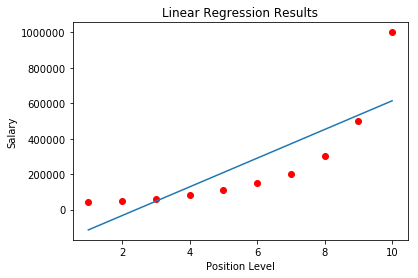

In [66]:
plt.title('Linear Regression Results')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.scatter(X,y, color='red')
plt.plot(X,lin_reg.predict(X))
plt.show()

*Notice how the predicted salary for the CEO and how incorrect the model is*

## Visualising the Polynomial Regression results

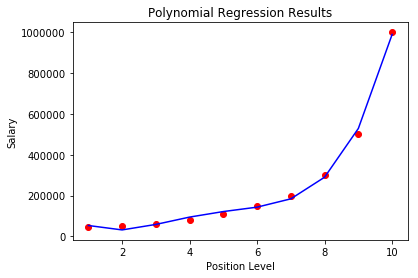

In [67]:
plt.title('Polynomial Regression Results')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.scatter(X,y, color='red')
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)),color='blue')
plt.show()

*This result is much better than the simple linear regression model, **Note** that lowering the degree will lower the quality of the model* 

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

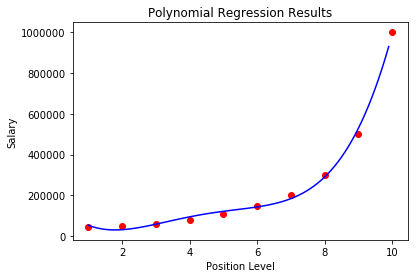

In [68]:
x_grid = np.arange(min(X), max(X),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.title('Polynomial Regression Results')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.scatter(X,y, color='red')
plt.plot(x_grid,lin_reg_2.predict(poly_reg.fit_transform(x_grid)),color='blue')
plt.show()

## Predicting a new result with Linear Regression

In [69]:
print( lin_reg.predict([[6.5]]))
# or
# print( lin_reg.predict([[6.5]]) [0])

[330378.78787879]


## Predicting a new result with Polynomial Regression

In [70]:
x_employer = np.array([[6.5]])
x_employer.reshape((len(x_employer),1))
print(  lin_reg_2.predict(poly_reg.fit_transform(x_employer)) [0] )

158862.45265154913
